# Predicting House Prices: Data Analysis, Regression, and Model Evaluation

In [1]:
# ========== SETUP CELL ==========
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

# Load dataset (make sure the file kc_house_data.csv is in the same folder as this notebook)
df = pd.read_csv("kc_house_data.csv")

# Show first 5 rows just to confirm dataset loaded correctly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# ========== PART 1 ==========
# Display the data types of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
# ========== PART 2 ==========
# Drop the columns "id" and "Unnamed: 0" (if they exist), inplace=True
for col in ["id", "Unnamed: 0"]:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Show statistical summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# ========== PART 3 ==========
# Count unique values of floors, convert to DataFrame
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


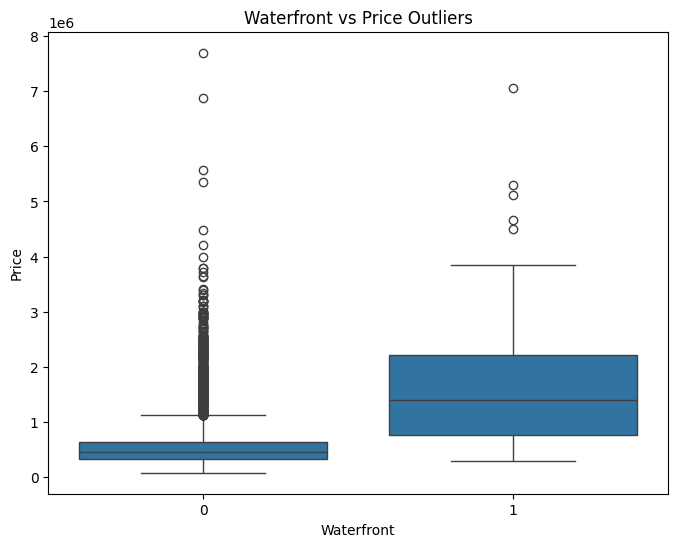

In [5]:
# ========== PART 4 ==========
# Boxplot for waterfront vs price
plt.figure(figsize=(8,6))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Waterfront vs Price Outliers")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

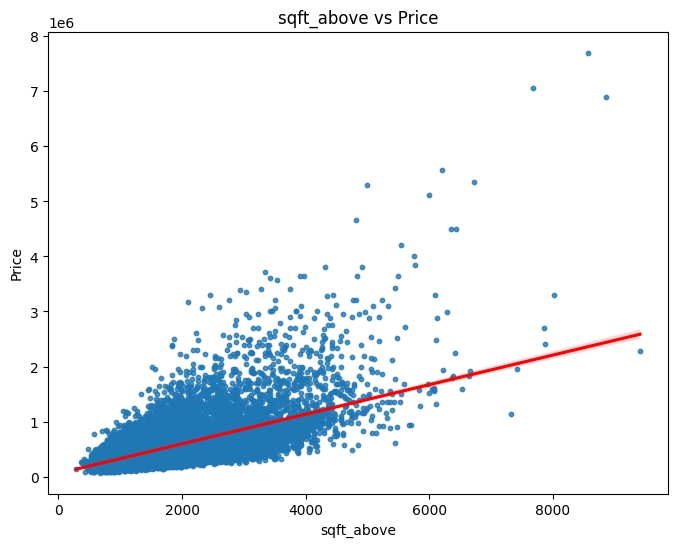

In [6]:
# ========== PART 5 ==========
# Regplot for sqft_above vs price
plt.figure(figsize=(8,6))
sns.regplot(x="sqft_above", y="price", data=df, scatter_kws={"s":10}, line_kws={"color":"red"})
plt.title("sqft_above vs Price")
plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.show()

In [7]:
# ========== PART 6 ==========
# Linear Regression with sqft_living
X = df[["sqft_living"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

r2 = lr.score(X_test, y_test)
print("R^2 using sqft_living:", r2)

R^2 using sqft_living: 0.49406905389089006


In [8]:
# ========== PART 7 ==========
# Linear Regression with multiple features
features = ["floors","waterfront","lat","bedrooms","sqft_basement","view",
            "bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

# Ensure only existing columns are used
features = [f for f in features if f in df.columns]

X = df[features]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

r2_multi = lr2.score(X_test, y_test)
print("R^2 using multiple features:", r2_multi)

R^2 using multiple features: 0.6614781405487566


In [9]:
# ========== PART 8 ==========
# Pipeline: scaling + polynomial transform + linear regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

pipeline.fit(X_train, y_train)
r2_pipe = pipeline.score(X_test, y_test)
print("R^2 using Pipeline (Scaler + Poly + LR):", r2_pipe)

R^2 using Pipeline (Scaler + Poly + LR): 0.7114140982349175


In [10]:
# ========== PART 9 ==========
# Ridge Regression with alpha=0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print("R^2 using Ridge (alpha=0.1):", r2_ridge)

R^2 using Ridge (alpha=0.1): 0.6614734596866666


In [11]:
# ========== PART 10 ==========
# Polynomial transform + Ridge regression
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.transform(X_test)

ridge2 = Ridge(alpha=0.1)
ridge2.fit(X_train_poly, y_train)
r2_ridge2 = ridge2.score(X_test_poly, y_test)
print("R^2 using Ridge with Polynomial Features (degree=2, alpha=0.1):", r2_ridge2)

R^2 using Ridge with Polynomial Features (degree=2, alpha=0.1): 0.7003486866532742


# Author:
Hashim Shaikh